In [2]:
import time
import numpy as np
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import KNNBasic
import matplotlib.pyplot as plt

## Party A:

In [4]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
ratings = Dataset.load_from_file('./datasets/ratings_small.csv', reader=reader)

## Part C:

In [77]:
# Probabilistic Matrix Factorization
pmf = SVD()
pmf_rmse = cross_validate(pmf, ratings, measures=['RMSE'], cv=5, verbose=True)

print()
print()

pmf_mae = cross_validate(pmf, ratings, measures=['MAE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8937  0.8976  0.8975  0.8990  0.8959  0.8967  0.0018  
Fit time          3.10    3.18    3.15    3.13    3.11    3.14    0.03    
Test time         0.08    0.09    0.08    0.15    0.15    0.11    0.03    


Evaluating MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6928  0.6944  0.6898  0.6873  0.6953  0.6919  0.0030  
Fit time          3.70    3.10    3.14    3.16    3.08    3.24    0.23    
Test time         0.08    0.09    0.14    0.14    0.16    0.12    0.03    


In [78]:
# User Based Collaborative Filtering
ucf = KNNBasic(sim_options={'user_based': True})
ucf_rmse = cross_validate(ucf, ratings, measures=['RMSE'], cv=5, verbose=True)

print()
print()

ucf_mae = cross_validate(ucf, ratings, measures=['MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9703  0.9802  0.9612  0.9637  0.9629  0.9677  0.0070  
Fit time          0.06    0.08    0.07    0.08    0.07    0.07    0.01    
Test time         0.88    0.88    0.99    1.09    1.00    0.97    0.08    


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing simila

In [79]:
# Item Based Collaborative Filtering
icf = KNNBasic(sim_options={'user_based': False})
icf_rmse = cross_validate(icf, ratings, measures=['RMSE'], cv=5, verbose=True)

print()
print()

icf_mae = cross_validate(icf, ratings, measures=['MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9328  0.9343  0.9307  0.9356  0.9384  0.9344  0.0026  
Fit time          2.13    2.20    2.19    2.21    2.15    2.18    0.03    
Test time         3.96    4.80    3.88    3.91    4.06    4.12    0.34    


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing simila

## Part D:
#### Performances for PMF, UCF, and ICF with respect to RMSE and MAE

Based on the 5 fold cross-validation results we get the following observations:
    
**RMSE**:

The User Based Collaborative Filter (UCF) performed the best in both training and testing as well.

**MAE**:

The User Based Collaborative Filter (UCF) performed the best in both training and testing for MAE as well.

## Part E:

In [170]:
ucf_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})

ucf_cosine_rmse = cross_validate(ucf_cosine, ratings, measures=['RMSE'], cv=5, verbose=False)
ucf_cosine_rmse_avg = sum(ucf_cosine_rmse['fit_time']) / 5

print()
print()

ucf_cosine_mae = cross_validate(ucf_cosine, ratings, measures=['MAE'], cv=5, verbose=False)
ucf_cosine_mae_avg = sum(ucf_cosine_mae['fit_time']) / 5

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [178]:
ucf_msd = KNNBasic(sim_options={'name': 'MSD', 'user_based': True})

ucf_msd_rmse = cross_validate(ucf_msd, ratings, measures=['RMSE'], cv=5, verbose=False)
ucf_msd_rmse_avg = sum(ucf_msd_rmse['fit_time']) / 5

print()
print()

ucf_msd_mae = cross_validate(ucf_msd, ratings, measures=['MAE'], cv=5, verbose=False)
ucf_msd_mae_avg = sum(ucf_msd_mae['fit_time']) / 5

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [179]:
ucf_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': True})

ucf_pearson_rmse = cross_validate(ucf_pearson, ratings, measures=['RMSE'], cv=5, verbose=False)
ucf_pearson_rmse_avg = sum(ucf_pearson_rmse['fit_time']) / 5

print()
print()

ucf_pearson_mae = cross_validate(ucf_pearson, ratings, measures=['MAE'], cv=5, verbose=False)
ucf_pearson_mae_avg = sum(ucf_pearson_mae['fit_time']) / 5

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


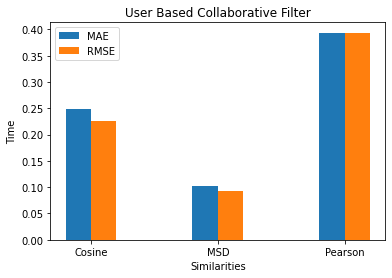

In [185]:
x = ['Cosine', 'MSD', 'Pearson']
X_axis = np.arange(len(x))

mae = [ucf_cosine_mae_avg, ucf_msd_mae_avg, ucf_pearson_mae_avg]
rmse = [ucf_cosine_rmse_avg, ucf_msd_rmse_avg, ucf_pearson_rmse_avg]

plt.bar(X_axis - 0.1, mae, width=0.2, label='MAE')
plt.bar(X_axis + 0.1, rmse, width=0.2, label='RMSE')

plt.xticks(X_axis, x)
plt.xlabel('Similarities')
plt.ylabel('Time')
plt.title('User Based Collaborative Filter')
plt.legend()

In [180]:
icf_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})

icf_cosine_rmse = cross_validate(icf_cosine, ratings, measures=['RMSE'], cv=5, verbose=False)
icf_cosine_rmse_avg = sum(icf_cosine_rmse['fit_time']) / 5

print()
print()

icf_cosine_mae = cross_validate(icf_cosine, ratings, measures=['MAE'], cv=5, verbose=False)
icf_cosine_mae_avg = sum(icf_cosine_mae['fit_time']) / 5

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [181]:
icf_msd = KNNBasic(sim_options={'name': 'MSD', 'user_based': False})

icf_msd_rmse = cross_validate(icf_msd, ratings, measures=['RMSE'], cv=5, verbose=False)
icf_msd_rmse_avg = sum(icf_msd_rmse['fit_time']) / 5

print()
print()

icf_msd_mae = cross_validate(icf_msd, ratings, measures=['MAE'], cv=5, verbose=False)
icf_msd_mae_avg = sum(icf_msd_mae['fit_time']) / 5

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [182]:
icf_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': False})

icf_pearson_rmse = cross_validate(icf_pearson, ratings, measures=['RMSE'], cv=5, verbose=False)
icf_pearson_rmse_avg = sum(icf_pearson_rmse['fit_time']) / 5

print()
print()

icf_pearson_mae = cross_validate(icf_pearson, ratings, measures=['MAE'], cv=5, verbose=False)
icf_pearson_mae_avg = sum(icf_pearson_mae['fit_time']) / 5

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


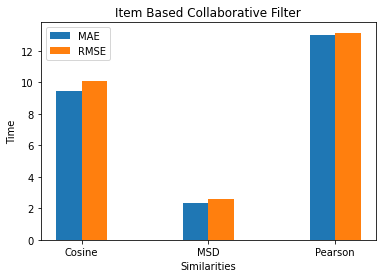

In [186]:
x = ['Cosine', 'MSD', 'Pearson']
X_axis = np.arange(len(x))

mae = [icf_cosine_mae_avg, icf_msd_mae_avg, icf_pearson_mae_avg]
rmse = [icf_cosine_rmse_avg, icf_msd_rmse_avg, icf_pearson_rmse_avg]

plt.bar(X_axis - 0.1, mae, width=0.2, label='MAE')
plt.bar(X_axis + 0.1, rmse, width=0.2, label='RMSE')

plt.xticks(X_axis, x)
plt.xlabel('Similarities')
plt.ylabel('Time')
plt.title('Item Based Collaborative Filter')
plt.legend()

## Part F:

In [5]:
x = []
y = []

for i in range(2, 41):
    ucf = KNNBasic(k=i, sim_options={'user_based': True})
    ucf_res = cross_validate(ucf, ratings, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    x.append(i)
    y.append(sum(ucf_res['fit_time']) / 5)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Text(0.5, 0, 'Number of Neighbors')

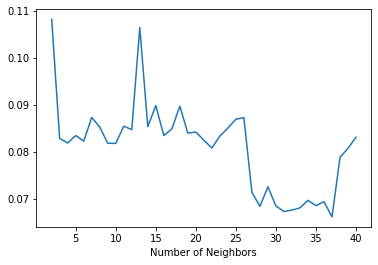

In [7]:
plt.plot(x, y)
plt.xlabel('Number of Neighbors')

In [9]:
x = []
y = []

for i in range(2, 41):
    icf = KNNBasic(k=i, sim_options={'user_based': False})
    icf_res = cross_validate(icf, ratings, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    x.append(i)
    y.append(sum(icf_res['fit_time']) / 5)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

Text(0.5, 0, 'Number of Neighbors')

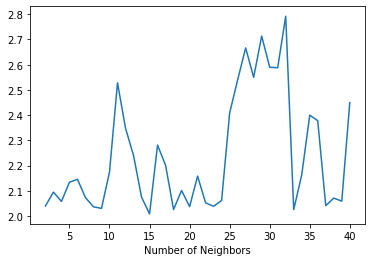

In [10]:
plt.plot(x, y)
plt.xlabel('Number of Neighbors')

## Part G:

### Item Based Collaborative Filtering:

According to the plot above for ICF, it appears that when $k = [27, 37]$. With an outstanding value of $k=37$ being the fastest.

### User Based Collaborative Filtering:

According to the plot above for UCF, it appears that when $k = 15$